In [1]:
import numpy as np
import pandas as pd
import glob
from active_learning.data_gen import ImgDataset, initialize_multi_gen
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
main_data_dir = "../all_train_300"

f1 = glob.glob(f"{main_data_dir}/train/*/*.jpeg")
f2 = glob.glob(f"{main_data_dir}/val/*/*.jpeg")
all_files = f1 + f2
labels = [j.split("/")[-2] for j in all_files]
full_df = pd.DataFrame(dict(files = all_files, labels = labels))
initial_d_unlabel = all_files
full_df.head()

,files,labels
0,../all_train_300/train/0/33951_left.jpeg,0
1,../all_train_300/train/0/23981_right.jpeg,0
2,../all_train_300/train/0/3806_right.jpeg,0
3,../all_train_300/train/0/38014_right.jpeg,0
4,../all_train_300/train/0/10061_left.jpeg,0


In [3]:
size = 400
batch_size = 4
t, v = initialize_multi_gen(full_df, full_df, size, batch_size, 4)

==
torch.Size([4, 3, 400, 400])
tensor([1, 1, 1, 1])
==
torch.Size([4, 3, 400, 400])
tensor([0, 2, 4, 2])
==
torch.Size([4, 3, 400, 400])
tensor([3, 0, 3, 0])


Exception: 

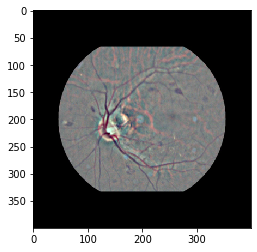

In [4]:
for i, (input, target) in enumerate(v):
    print("==")
    x = input.numpy()
    print(input.shape)
    print(target.long())
    x1 = x[0].transpose(1,2,0)
    plt.imshow(x1)
    if i == 2:
        raise Exception()


In [5]:
idx = 0
img_name = full_df["files"].values[idx]

In [6]:
size = 400
transform_train = transforms.Compose([
        transforms.Resize((size, size)),
        transforms.RandomRotation(180),
        transforms.RandomHorizontalFlip(),
#         transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

d = ImgDataset(full_df, transform = transform_train)
dataset_loader = torch.utils.data.DataLoader(d,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

==
==
==


Exception: 

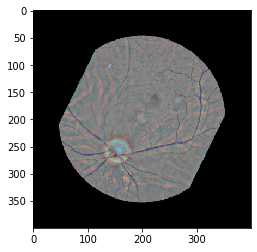

In [16]:
for i, (input, target) in enumerate(dataset_loader):
#     plt.imshow(k)
#     print(input)
    print("==")
    x = input.numpy()
    x1 = x[0].transpose(1,2,0)
    plt.imshow(x1)
    if i == 2:
        raise Exception()


In [1]:
import numpy as np
import pandas as pd
import glob
from active_learning.data_gen import ImgDataset, initialize_multi_gen
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
main_data_dir = "../all_train_300"

f1 = glob.glob(f"{main_data_dir}/train/*/*.jpeg")
f2 = glob.glob(f"{main_data_dir}/val/*/*.jpeg")
all_files = f1 + f2
labels = [j.split("/")[-2] for j in all_files]
full_df = pd.DataFrame(dict(files = all_files, labels = labels))
initial_d_unlabel = all_files
full_df.head()

,files,labels
0,../all_train_300/train/0/33951_left.jpeg,0
1,../all_train_300/train/0/23981_right.jpeg,0
2,../all_train_300/train/0/3806_right.jpeg,0
3,../all_train_300/train/0/38014_right.jpeg,0
4,../all_train_300/train/0/10061_left.jpeg,0


In [2]:
# CUDA_VISIBLE_DEVICES=1 python extract_torch_features.py
import torch
from tqdm import tqdm
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision import models
from pytorch.model_helper import select_model, select_metric
import joblib
import numpy as np
import os

if torch.cuda.is_available():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

main_model_dir = "AL/active_learning_v1_v21/step_000" #torch_models
model_type = "xception"
best = "best_acc_"
batch_size = 10

metric_type = "softmax"
model=select_model(model_type, {})

PATH = f"./{main_model_dir}/{best}model.pth"
PATH2 = f"./{main_model_dir}/{best}metric_fc.pth"

metric_fc = select_metric(metric_type, num_ftr = 1000, num_classes = 5)

model.load_state_dict(torch.load(PATH))
metric_fc.load_state_dict(torch.load(PATH2))
model.eval()
metric_fc.eval()


Linear(in_features=1000, out_features=5, bias=True)

In [3]:
from active_learning.data_gen import create_data_loader
from active_learning.extract_features import extract_features

In [11]:
data_loader = create_data_loader(full_df, 400, 6)

In [12]:
f, y = extract_features(model, data_loader)

100%|██████████| 1882/1882 [01:19<00:00, 23.64it/s]


(11289, 1000) (11289,)


In [13]:
full_df.shape

(11289, 2)

In [16]:
full_df["f"] = [j for j in f]

In [21]:
full_df["y"] = y

In [35]:
np.mean([j[1] for j in full_df["f"].head()])

2.3021809220314027

In [31]:
full_df["f"].head().values.mean()

array([-6.93834753e-01,  2.30218092e+00,  1.98522543e+00,  6.71990806e-01,
        9.41414356e-01, -1.65890554e+00, -6.11780182e-01,  1.08938038e-02,
        8.71975929e-01,  1.00652715e+00, -2.09670092e+00, -1.21216757e+00,
       -1.53077334e-01,  1.35052617e+00, -1.57303342e+00, -1.18107739e+00,
        8.47844809e-01, -4.64534813e-01, -6.98510948e-01, -4.39011447e-02,
       -1.12031228e+00,  2.26273227e-01, -2.64711645e-01, -3.28838636e-01,
       -8.75159310e-01, -3.42083966e+00, -2.49726825e+00, -2.34780367e+00,
       -2.74455904e+00, -8.97664058e-01,  1.47482591e+00,  3.84045091e-01,
        1.61793919e+00,  2.71312961e-01,  1.34323200e+00, -2.57553905e-01,
       -1.25287070e+00, -1.67883458e+00,  5.93892428e-01, -2.05862683e-01,
       -8.90818332e-01, -1.09063896e+00, -3.03444517e-01, -8.62814426e-02,
       -7.01202479e-01,  5.80834711e-01, -4.34591672e-01, -1.15156652e+00,
        9.23194498e-01,  2.45953338e+00,  2.72321404e+00,  5.17573619e-01,
       -5.31354684e-01, -